# 커피지수 (스타벅스 + 커피빈) / (이디야, 빽다방)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import platform
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm_notebook
from glob import glob
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

### 데이터를 읽고 하나로 합쳤습니다

In [2]:
files = glob("./data/지역/*.csv")
df = pd.read_csv(files[0],sep='|')
for file in tqdm_notebook(files[1:]):
    df = df.append(pd.read_csv(file,sep='|'))
# do_list = ['강원','경기','경남','경북','광주','대구','대전','부산','서울','세종','울산','인천','전남','전북','제주','충남','충북']
# df = pd.read_csv('./data/지역/소상공인시장진흥공단_상가(상권)정보_강원_202009.csv',sep='|')
# for do in tqdm_notebook(do_list[1:]):
#     df = df.append(pd.read_csv(f'./data/소상공인시장진흥공단_상가(상권)정보_{do}_202009.csv',sep='|'))

In [3]:
df_cafe = df[df['상권업종중분류명'].str.contains("카페")][["상호명",'지점명','도로명주소','경도','위도']]
df_cafe = df_cafe.fillna('')
df_cafe.head()

,상호명,지점명,도로명주소,경도,위도
20,펠로톤,,강원도 강릉시 임영로 115,128.893468,37.751919
23,키즈까페아이사랑,,강원도 강릉시 성덕포남로 45-8,128.919456,37.759315
30,상유재카페,,강원도 정선군 정선읍 정선로 1323,128.660805,37.379458
213,동물과사람,,강원도 원주시 천매봉길 117,127.943047,37.326277
274,카페비엔또,,강원도 영월군 영월읍 중앙1로 59,128.465690,37.186503


### 상호명 고치기

In [4]:
error_paik_list = ['백다방전북대','백다방','백다방화정','백다방수원권선웰빙점','백다방전주객사점','백다방커피']
df_cafe['상호명'].replace('스타박스','스타벅스',inplace=True)
df_cafe['상호명'].replace(error_paik_list,'빽다방',inplace=True)

In [5]:
df_cafe[df_cafe['상호명'].str.contains("백다방",case=False)]

,상호명,지점명,도로명주소,경도,위도
70573,컴백다방,,경기도 포천시 소흘읍 솔모루로78번길 8,127.147357,37.827853
270849,연백다방,,경기도 수원시 장안구 경수대로894번길 10,127.012129,37.300172
11418,송백다방,,경상남도 창원시 마산회원구 합성남3길 84-1,128.587677,35.237594
19774,동백다방,,경상남도 거창군 거창읍 거열로 209,127.916179,35.691358
27957,동백다방,,경상남도 통영시 남망길 199,128.431785,34.840250
35331,송백다방,,경상남도 함양군 서하면 송계앞길 5,127.696281,35.647522
50843,송백다방,,경상남도 밀양시 산내면 산내로 343,128.881233,35.586230
85725,태백다방,,경상남도 남해군 창선면 옥천로 3,128.012891,34.854979
114162,송백다방,,경상남도 함양군 서하면 송계길 27,127.695133,35.647330
144030,동백다방,,경상남도 창녕군 대합면 창한로 106-1,128.471795,35.613045


### 도로명 주소로 시도 추가

In [6]:
df_cafe['광역시도'] = df_cafe['도로명주소'].str.split().str[0]
df_cafe['시군구'] = df_cafe['도로명주소'].str.split().str[1]
df_cafe['행정구'] = df_cafe['도로명주소'].str.split().str[2]

df_cafe.head()

,상호명,지점명,도로명주소,경도,위도,광역시도,시군구,행정구
20,펠로톤,,강원도 강릉시 임영로 115,128.893468,37.751919,강원도,강릉시,임영로
23,키즈까페아이사랑,,강원도 강릉시 성덕포남로 45-8,128.919456,37.759315,강원도,강릉시,성덕포남로
30,상유재카페,,강원도 정선군 정선읍 정선로 1323,128.660805,37.379458,강원도,정선군,정선읍
213,동물과사람,,강원도 원주시 천매봉길 117,127.943047,37.326277,강원도,원주시,천매봉길
274,카페비엔또,,강원도 영월군 영월읍 중앙1로 59,128.465690,37.186503,강원도,영월군,영월읍


In [7]:
df_cafe[df_cafe['광역시도'] == '서울특별시']

,상호명,지점명,도로명주소,경도,위도,광역시도,시군구,행정구
0,커피빈코리아선릉로93길점,코리아선릉로93길점,서울특별시 강남구 선릉로93길 6,127.047883,37.505675,서울특별시,강남구,선릉로93길
4,고려대학교교육관쎄리오점,,서울특별시 성북구 안암로 145,127.031702,37.588485,서울특별시,성북구,안암로
7,스완카페트,,서울특별시 영등포구 도신로10가길 11-1,126.897710,37.503693,서울특별시,영등포구,도신로10가길
25,왕실,,서울특별시 중구 남대문로 52-13,126.982419,37.562274,서울특별시,중구,남대문로
29,커피빈,코리아교대점,서울특별시 서초구 서초중앙로 118,127.014217,37.492388,서울특별시,서초구,서초중앙로
...,...,...,...,...,...,...,...,...
367498,와플대학,상일동역캠퍼스,서울특별시 강동구 고덕로79길 29,127.164702,37.558063,서울특별시,강동구,고덕로79길
367523,hebecoffee,,서울특별시 중구 필동로 32,126.995981,37.558768,서울특별시,중구,필동로
367524,티랩차연구소,,서울특별시 강남구 테헤란로 147,127.035662,37.500836,서울특별시,강남구,테헤란로
367525,사사이프로젝트,,서울특별시 광진구 광나루로 428,127.076909,37.545822,서울특별시,광진구,광나루로


### 스타벅스와 커피빈, 이디야와 빽다방 따로 추림

In [8]:
df_cafe_star = df_cafe[df_cafe['상호명'].str.contains("스타벅스|starbucks",case=False)].reset_index()
df_cafe_Coffe = df_cafe[df_cafe['상호명'].str.contains("커피빈|coffeebean",case=False)].reset_index()

In [9]:
df_cafe_edi = df_cafe[df_cafe['상호명'].str.contains("이디야|ediya|이디아",case=False)].reset_index()
df_cafe_paik = df_cafe[df_cafe['상호명'].str.contains("빽다방|PAIKSCOFFEE",case=False)].reset_index()

In [10]:
df_cafe_star.to_csv('./data/starbucks.csv')
df_cafe_Coffe.to_csv('./data/coffeebean.csv')
df_cafe_edi.to_csv('./data/ediya.csv')
df_cafe_paik.to_csv('./data/paikscoffee.csv')

### 각 ID 추가

In [11]:
# 모듈에서 함수들 끌고 오기
from def_module import *

In [12]:
cafe_list = [df_cafe_star,df_cafe_Coffe,df_cafe_edi,df_cafe_paik]
for i in cafe_list:
    insert_ID(i)

In [13]:
a = pivot_cafes(df_cafe_star).rename(columns={'도로명주소':'스타벅스 매장수'})
b = pivot_cafes(df_cafe_Coffe).rename(columns={'도로명주소':'커피빈 매장수'})
c = pivot_cafes(df_cafe_edi).rename(columns={'도로명주소':'이디야 매장수'})
d = pivot_cafes(df_cafe_paik).rename(columns={'도로명주소':'빽다방 매장수'})
cafe_count = pd.concat([a,b,c,d],axis=1).fillna(0).reset_index().rename(columns={'index':'ID'})
cafe_count

,ID,스타벅스 매장수,커피빈 매장수,이디야 매장수,빽다방 매장수
0,강릉,5.0,0.0,15.0,2.0
1,거제,5.0,0.0,7.0,0.0
2,경산,8.0,0.0,9.0,3.0
3,경주,8.0,2.0,25.0,2.0
4,계룡,1.0,0.0,1.0,0.0
...,...,...,...,...,...
232,합천,0.0,0.0,1.0,0.0
233,홍성,0.0,0.0,4.0,2.0
234,화천,0.0,0.0,1.0,0.0
235,횡성,0.0,0.0,1.0,0.0


### 아에 아무 가게도 없는 곳 0입력

In [14]:
# 카토그램에 필요하지만 not_exist_list에도 필요해서 먼저 데이터를 가져옴
draw_korea_raw = pd.read_excel("./data/draw_korea_raw.xlsx")
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked.rename(columns={'level_0':'y','level_1':'x',0:'ID'},inplace=True)
draw_korea = draw_korea_raw_stacked
draw_korea[draw_korea['ID'].str.contains("인천")]

,y,x,ID
39,5,1,인천 강화
50,6,1,인천 서구
51,6,2,인천 동구
61,7,2,인천 계양
71,8,2,인천 부평
82,9,1,인천 중구
83,9,2,인천 미추홀
93,10,0,인천 옹진
94,10,1,인천 연수
95,10,2,인천 남동


In [15]:
not_exist_list = list(set(draw_korea['ID'].unique()) - set(cafe_count['ID'].unique()))
not_exist_list

['의성', '의령', '영월', '장흥', '함평', '보성', '진안', '구례', '신안', '화순', '군위', '울릉', '장수']

In [16]:
for i in not_exist_list:
    row = [i,0,0,0,0]
    cafe_count = cafe_count.append(cafe_count.iloc[-1], ignore_index=True)
    cafe_count.iloc[-1] = row
cafe_count.loc[-8:]

,ID,스타벅스 매장수,커피빈 매장수,이디야 매장수,빽다방 매장수
0,강릉,5.0,0.0,15.0,2.0
1,거제,5.0,0.0,7.0,0.0
2,경산,8.0,0.0,9.0,3.0
3,경주,8.0,2.0,25.0,2.0
4,계룡,1.0,0.0,1.0,0.0
...,...,...,...,...,...
245,신안,0.0,0.0,0.0,0.0
246,화순,0.0,0.0,0.0,0.0
247,군위,0.0,0.0,0.0,0.0
248,울릉,0.0,0.0,0.0,0.0


### 순위

In [17]:
cafe_count.sort_values(by='스타벅스 매장수',ascending=False).head()[['ID','스타벅스 매장수']]

,ID,스타벅스 매장수
73,서울 강남,87.0
96,서울 중구,57.0
87,서울 서초,49.0
99,성남 분당,48.0
90,서울 송파,34.0


In [18]:
cafe_count.sort_values(by='커피빈 매장수',ascending=False).head()[['ID','커피빈 매장수']]

,ID,커피빈 매장수
73,서울 강남,69.0
87,서울 서초,31.0
99,성남 분당,17.0
95,서울 종로,15.0
96,서울 중구,15.0


In [19]:
cafe_count.sort_values(by='이디야 매장수',ascending=False).head()[['ID','이디야 매장수']]

,ID,이디야 매장수
76,서울 강서,47.0
73,서울 강남,47.0
28,남양주,46.0
144,인천 남동,35.0
67,부천,33.0


In [20]:
cafe_count.sort_values(by='빽다방 매장수',ascending=False).head()[['ID','빽다방 매장수']]

,ID,빽다방 매장수
73,서울 강남,13.0
144,인천 남동,13.0
99,성남 분당,12.0
188,화성,12.0
41,대전 서구,10.0


### 커피지수 추가

In [21]:
cafe_count['coffee_index'] = (cafe_count['스타벅스 매장수'] + cafe_count['커피빈 매장수']) / (cafe_count['이디야 매장수'] + cafe_count['빽다방 매장수'])
# NaN처리
cafe_count['coffee_index'] = cafe_count['coffee_index'].fillna(0)
cafe_count['coffee_index']

0      0.294118
1      0.714286
2      0.666667
3      0.370370
4      1.000000
         ...   
245    0.000000
246    0.000000
247    0.000000
248    0.000000
249    0.000000
Name: coffee_index, Length: 250, dtype: float64

### cartogram

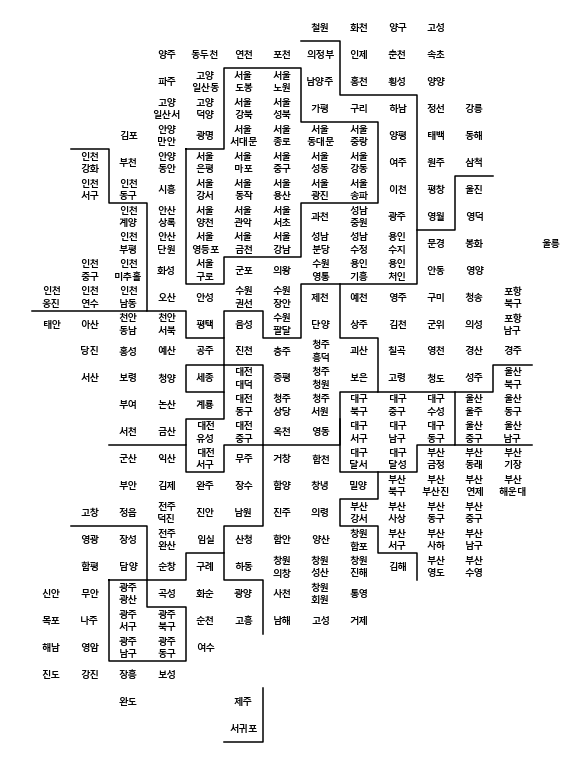

In [22]:
carto(draw_korea)

In [23]:
# tmp_list = list(set(cafe_count['ID'].unique()) - set(draw_korea['ID'].unique()))
# for tmp in tmp_list:
#     cafe_count = cafe_count.drop(cafe_count[cafe_count['ID']==tmp].index)
# tmp_list

In [24]:
# inf 처리
cafe_count = cafe_count.replace([np.inf, -np.inf], 0)
cafe_count = pd.merge(cafe_count, draw_korea, how='left', on=['ID'])
cafe_count[cafe_count['coffee_index'] == np.inf]

,ID,스타벅스 매장수,커피빈 매장수,이디야 매장수,빽다방 매장수,coffee_index,y,x


### 커피지수

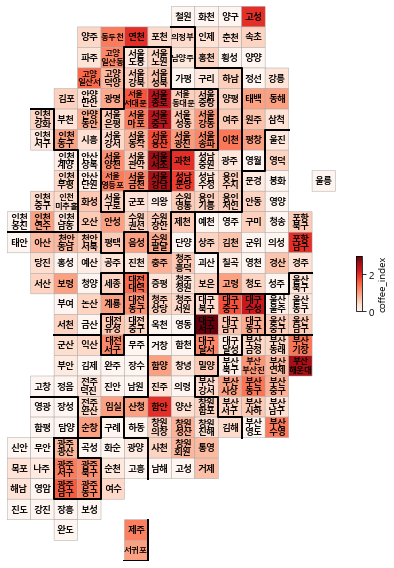

In [25]:
drawKorea('coffee_index', cafe_count, 'Reds')


### 지도에 그리기

In [26]:
import folium
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [27]:
cafe_count_folium = cafe_count.set_index('ID')
cafe_count_folium[cafe_count_folium.index == '신안'].head()

,스타벅스 매장수,커피빈 매장수,이디야 매장수,빽다방 매장수,coffee_index,y,x
ID,,,,,,,
신안,0.0,0.0,0.0,0.0,0.0,21,0


In [28]:
geo_path = './data/05. skorea_municipalities_geo_simple_수정.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))
map =folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data=geo_data,
              data= cafe_count_folium['coffee_index'],
              columns=[cafe_count_folium.index, cafe_count_folium['coffee_index']],
              fill_color='YlGnBu',
              key_on='feature.id')
title_html = '''
             <h3 align="center" style="font-size:20px"><b>카페지수</b></h3>
             '''
map.get_root().html.add_child(folium.Element(title_html))
map

In [29]:
cafe_count[cafe_count['ID'].str.contains("인천")]

,ID,스타벅스 매장수,커피빈 매장수,이디야 매장수,빽다방 매장수,coffee_index,y,x
142,인천 강화,1.0,0.0,1.0,1.0,0.500000,5,1
143,인천 계양,3.0,0.0,13.0,6.0,0.157895,7,2
144,인천 남동,14.0,1.0,35.0,13.0,0.312500,10,2
145,인천 동구,2.0,0.0,2.0,0.0,1.000000,6,2
146,인천 미추홀,8.0,0.0,14.0,4.0,0.444444,9,2
147,인천 부평,11.0,2.0,26.0,2.0,0.464286,8,2
148,인천 서구,8.0,0.0,27.0,5.0,0.250000,6,1
149,인천 연수,14.0,7.0,14.0,7.0,1.000000,10,1
150,인천 중구,5.0,3.0,14.0,4.0,0.444444,9,1
224,인천 옹진,0.0,0.0,2.0,0.0,0.000000,10,0
